In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_final_with_scaled.csv')
df.head(6)

,Unnamed: 0,tract,year,id,growth,growth_per_sqft,mean_rent,mean_rent_per,total_units,region,...,county_male_population,county_female_population,county_0-19_pop,county_20-29_pop,county_30-39_pop,county_40-49_pop,county_50-59_pop,county_60-69_pop,county_70+_pop,employment_rate
0,0,1003010500,2016,10030105002016,3.479098,3.968254,627.083333,0.655000,68.0,s,...,2705.500000,2858.0,1416.500000,537.500000,647.5,712.000000,704.000000,761.50,763.50,0.939210
1,1,1003010500,2017,10030105002017,4.598007,4.071247,655.916667,0.681667,68.0,s,...,2728.000000,2961.0,1493.000000,524.500000,580.5,653.500000,704.500000,897.00,705.50,0.956169
2,2,1003010500,2018,10030105002018,-5.107356,-4.889976,622.416667,0.648333,68.0,s,...,2701.500000,2806.0,1313.000000,563.500000,530.5,661.000000,703.500000,867.50,826.00,0.957600
3,3,1003010500,2019,10030105002019,1.017539,1.285347,628.750000,0.656667,68.0,s,...,2991.000000,2816.0,1383.000000,625.000000,586.0,728.500000,748.000000,921.00,852.50,0.976297
4,4,1003010500,2020,10030105002020,5.990722,5.837563,666.416667,0.695000,68.0,s,...,2801.000000,2764.0,1288.500000,574.000000,531.5,756.500000,725.500000,887.25,806.75,0.965224
5,5,1003010500,2021,10030105002021,-2.450919,-2.637890,650.083333,0.676667,68.0,s,...,2777.166667,2950.5,1355.166667,606.916667,628.0,750.333333,801.333333,822.25,803.50,0.958614


In [284]:
df.columns

Index(['Unnamed: 0', 'tract', 'year', 'id', 'growth', 'growth_per_sqft',
       'mean_rent', 'mean_rent_per', 'total_units', 'region',
       ...
       'county_male_population', 'county_female_population', 'county_0-19_pop',
       'county_20-29_pop', 'county_30-39_pop', 'county_40-49_pop',
       'county_50-59_pop', 'county_60-69_pop', 'county_70+_pop',
       'employment_rate'],
      dtype='object', length=103)

In [285]:
tractid = df['tract'].unique()
tractid

array([ 1003010500,  1003010600,  1003010704, ..., 56039967802,
       56041975301, 56041975402], dtype=int64)

In [286]:
# find tract with data from 2017-2022
df1 = pd.DataFrame()
for i in tractid:
    if df[df['tract']==i]['year'].count() == 7:
        df1 = df1.append(df[df['tract']==i])


In [331]:
len(df1['tract'].unique())

10995

In [289]:
df_6 = df1[df1['year'] != 2016]
df_6 = df_6.set_index(["tract","year"])
df_6

Unnamed: 0               id     growth  growth_per_sqft  \
tract       year                                                            
1003010500  2017           1   10030105002017   4.598007         4.071247   
            2018           2   10030105002018  -5.107356        -4.889976   
            2019           3   10030105002019   1.017539         1.285347   
            2020           4   10030105002020   5.990722         5.837563   
            2021           5   10030105002021  -2.450919        -2.637890   
...                      ...              ...        ...              ...   
49057211202 2018       82237  490572112022018   7.820181         7.733051   
            2019       82238  490572112022019  13.569297        13.864307   
            2020       82239  490572112022020   8.605211         8.290155   
            2021       82240  490572112022021  20.961022        21.212121   
            2022       82241  490572112022022  10.912828        11.000000   

                    mean_rent  mean_rent_per  total_units region  state_code  \
tract       year                                                               
1003010500  2017   655.916667       0.681667         68.0      s           1   
            2018   622.416667       0.648333         68.0      s           1   
            2019   628.750000       0.656667         68.0      s           1   
            2020   666.416667       0.695000         68.0      s           1   
            2021   650.083333       0.676667         68.0      s           1   
...                       ...            ...          ...    ...         ...   
49057211202 2018  1005.333333       0.847500        288.0      w          49   
            2019  1141.750000       0.965000        288.0      w          49   
            2020  1240.000000       1.045000        288.0      w          49   
            2021  1499.916667       1.266667        288.0      w          49   
            2022  1663.600000       1.406000        288.0      w          49   

                  county  ...  county_male_population  \
tract       year          ...                           
1003010500  2017       3  ...             2728.000000   
            2018       3  ...             2701.500000   
            2019       3  ...             2991.000000   
            2020       3  ...             2801.000000   
            2021       3  ...             2777.166667   
...                  ...  ...                     ...   
49057211202 2018      57  ...             2266.500000   
            2019      57  ...             2316.000000   
            2020      57  ...             2122.500000   
            2021      57  ...             2206.666667   
            2022      57  ...             2229.916667   

                  county_female_population county_0-19_pop  county_20-29_pop  \
tract       year                                                               
1003010500  2017                    2961.0     1493.000000        524.500000   
            2018                    2806.0     1313.000000        563.500000   
            2019                    2816.0     1383.000000        625.000000   
            2020                    2764.0     1288.500000        574.000000   
            2021                    2950.5     1355.166667        606.916667   
...                                    ...             ...               ...   
49057211202 2018                    2279.0     1375.500000        716.000000   
            2019                    2288.0     1309.500000        689.000000   
            2020                    2047.0     1231.000000        611.000000   
            2021                    2097.0     1259.500000        645.833333   
            2022                    2182.0     1385.166667        656.833333   

                  county_30-39_pop  county_40-49_pop  county_50-59_pop  \
tract       year                                                         
1003010500  2017        580.500000        65

In [ ]:
df_6['men_per'] = df_6['male_population']/df_6['population']
df_6['over20_per'] = (df_6['pop_20_29']+df_6['pop_30_39']+df_6['pop_40_49'])/df_6['population']

In [290]:
import statsmodels.api as sm
from linearmodels.panel import PooledOLS


In [292]:
df_1719 = df_6.loc[(df_6.index.get_level_values('year') <= 2019)]

In [294]:
df_2022 = df_6.loc[(df_6.index.get_level_values('year') >= 2020)]

In [295]:
df_22 = df_6.loc[(df_6.index.get_level_values('year') == 2022)]

In [380]:
dataset = df_6
tractid_n = dataset.index.get_level_values('tract')
tractid_n

Int64Index([ 1003010500,  1003010500,  1003010500,  1003010500,  1003010500,
             1003010500,  1003010600,  1003010600,  1003010600,  1003010600,
            ...
            49057211100, 49057211100, 49057211100, 49057211100, 49057211202,
            49057211202, 49057211202, 49057211202, 49057211202, 49057211202],
           dtype='int64', name='tract', length=65970)

In [381]:
for i in tractid_n:
    dataset.loc[(i,2017),'y'] = float(dataset.loc[(i,2020),'mean_rent_per'])
    dataset.loc[(i,2018),'y'] = float(dataset.loc[(i,2021),'mean_rent_per'])
    dataset.loc[(i,2019),'y'] = float(dataset.loc[(i,2022),'mean_rent_per'])

In [383]:
dataset = dataset.loc[(dataset.index.get_level_values('year') <= 2019)]

In [404]:
vars = ['total_units', 'property_sqft', 'property_value','current_rent',
       'income_tax_rate', 'combined_rate', 'over20_per','corporate_tax_rate','median_income',
       'avg_household_income', 'median_debt', 'population', 
       'men_per', 'occupancy_rate', 'house_supply', 'crime_rate', 
       'corp_bond','colleges_per', 'banks_per', 'public_schools_per',
       'starbucks_vists_per','hospitals_per','private_schools_per', 'employment_rate',  
       'real_estate','stocks_bills','inflation']
exog = sm.add_constant(dataset[vars])
mod = PooledOLS(dataset.y, exog, check_rank=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

c:\Users\Silvia\anaconda3\lib\site-packages\linearmodels\panel\model.py:855: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PooledOLS Estimation Summary                          
Dep. Variable:                      y   R-squared:                        0.8608
Estimator:                  PooledOLS   R-squared (Between):              0.8724
No. Observations:               32979   R-squared (Within):               0.6725
Date:                Wed, Jun 29 2022   R-squared (Overall):              0.8608
Time:                        16:45:08   Log-likelihood                    1768.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7545.8
Entities:                       10993   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                F(27,32951)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1528.9
                            

c:\Users\Silvia\anaconda3\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


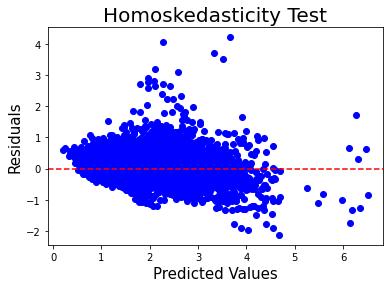

In [389]:
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = res.predict().fitted_values
residuals_pooled_OLS = res.resids

# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 20)
plt.show()

In [390]:
vars_all = ['total_units', 'property_sqft', 'property_value','current_rent',
       'income_tax_rate', 'combined_rate', 'over20_per','corporate_tax_rate','median_income',
       'avg_household_income', 'median_debt', 'population', 
       'men_per', 'occupancy_rate', 'house_supply', 'crime_rate', 
       'corp_bond','colleges_per', 'banks_per', 'public_schools_per',
       'starbucks_vists_per','hospitals_per','private_schools_per', 'employment_rate',  
       'real_estate','stocks_bills','inflation','y']

In [391]:
from statsmodels.stats.stattools import durbin_watson
pooled_OLS_dataset = pd.concat([dataset[vars_all], residuals_pooled_OLS], axis=1)
durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

nan


In [410]:
para = pd.DataFrame(res.params)

In [ ]:
# df_2022['const'] = float(para.loc['const'])
# df_2022['forecast_in_3_years'] = res.predict(df_2022[vars])

In [413]:
# df_22['const'] = float(para.loc['const'])
# vars_all = ['const','total_units', 'property_sqft', 'property_value','current_rent',
#        'income_tax_rate', 'combined_rate', 'over20_per','corporate_tax_rate','median_income',
#        'avg_household_income', 'median_debt', 'population', 
#        'men_per', 'occupancy_rate', 'house_supply', 'crime_rate', 
#        'corp_bond',
#        'colleges_per', 'banks_per', 'public_schools_per','starbucks_vists_per','hospitals_per',
#        'private_schools_per', 'employment_rate',  'real_estate',
#        'stocks_bills','inflation']
# df_22['pred_25'] = res.predict(df_22[vars_all])
# df_22['growth_25'] = (df_22['pred_25']-df_22['mean_rent_per'])/df_22['mean_rent_per']

<ipython-input-413-7ff1c81bf6db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22['const'] = float(para.loc['const'])
<ipython-input-413-7ff1c81bf6db>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22['pred_25'] = res.predict(df_22[vars_all])
<ipython-input-413-7ff1c81bf6db>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [414]:
# df_22.sort_values(by='growth_25', ascending=False).head(10)


,,Unnamed: 0,id,growth,growth_per_sqft,mean_rent,mean_rent_per,total_units,region,state_code,county,...,county_40-49_pop,county_50-59_pop,county_60-69_pop,county_70+_pop,employment_rate,men_per,over20_per,const,pred_25,growth_25
tract,year,,,,,,,,,,,,,,,,,,,,,
6073017813,2022,20079,60730178132022,4.216386,4.154752,4867.6,2.064,66.0,sc,6,73,...,595.833333,604.791667,472.500000,404.000000,0.904620,0.495141,0.443922,0.365592,3.279296,0.588806
6037143700,2022,8368,60371437002022,-3.290486,-3.257576,5561.2,2.554,67.0,sc,6,37,...,567.166667,526.708333,378.166667,329.833333,0.900786,0.480419,0.474031,0.365592,3.792840,0.485059
48201421402,2022,72576,482014214022022,4.083244,3.913043,725.2,0.956,1388.0,sw,48,201,...,640.625000,580.166667,415.875000,313.375000,0.942780,0.524876,0.475639,0.365592,1.158335,0.211648
6037264000,2022,9848,60372640002022,8.788029,8.751326,3102.0,2.562,50.0,sc,6,37,...,567.166667,526.708333,378.166667,329.833333,0.956108,0.434602,0.440547,0.365592,3.072562,0.199283
1097002502,2022,1163,10970025022022,5.086913,5.395538,876.6,0.866,214.0,s,1,97,...,355.333333,386.000000,358.333333,312.333333,0.909337,0.476163,0.384549,0.365592,1.019280,0.176998
18043070801,2022,42706,180430708012022,11.232781,10.928726,1063.2,0.856,180.0,s,18,43,...,483.333333,487.166667,451.500000,371.500000,0.936279,0.442810,0.385785,0.365592,0.969903,0.133064
6059063010,2022,14605,60590630102022,14.474378,14.526086,2386.6,3.494,1447.0,sc,6,59,...,700.000000,697.666667,498.333333,443.000000,0.955401,0.504307,0.515053,0.365592,3.809867,0.090403
6059062645,2022,14514,60590626452022,13.648232,13.654197,3954.4,3.386,351.5,sc,6,59,...,700.000000,697.666667,498.333333,443.000000,0.944499,0.417820,0.144689,0.365592,3.681873,0.087381
6037143401,2022,8319,60371434012022,10.456964,10.415335,2699.2,2.016,52.0,sc,6,37,...,567.166667,526.708333,378.166667,329.833333,0.916557,0.493167,0.431730,0.365592,2.189432,0.086028
